# 6.2.2 Exploring relationships

- 1. Importing Libraries and Data
- 2. Data streamlining
- 3. Exploring relationships between variables
    -  3a. Correlation Matrix Heatmaps
    -  3b. Scatterplots
    -  3c. Pair plots
    -  3d. Categorical plot
-  4. Project Questions Revisted
-  5. Hypotheses

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#Define path

path = r'C:\Users\Caroline\Documents\Career Foundry\06 2023 EVCS washington state'

In [5]:
# Import data

df_present = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_present.pkl'))

In [6]:
df_hist = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_hist.pkl'))

In [7]:
#check shape of imported data
df_present.shape

(1902, 25)

In [8]:
#check shape of imported data
df_hist.shape

(3203, 17)

## 2. Data streamlining

    - Simplifying EVCS data

In [9]:
df_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Station Name     1900 non-null   object        
 1   City             1900 non-null   object        
 2   County           1902 non-null   object        
 3   Latitude         1900 non-null   float64       
 4   Longitude        1900 non-null   float64       
 5   EV Level1        1902 non-null   int32         
 6   EV Level2        1902 non-null   int32         
 7   EV Level3        1902 non-null   int32         
 8   Open Date2       1900 non-null   datetime64[ns]
 9   evcs_sum         1902 non-null   int32         
 10  L3cs_sum_county  1900 non-null   float64       
 11  L3port present   1900 non-null   object        
 12  CountyPop_90     1902 non-null   int64         
 13  CountyPop_00     1902 non-null   int64         
 14  CountyPop_10     1902 non-null   int64  

In [10]:
#Drop columns not necessary for numerical comparisons
df_present = df_present.drop(columns = ['Year', 'Month', 'CountyPop_20', 'CountyPop_10', 'CountyPop_00', 'CountyPop_90'])
df_present = df_present.drop(columns = ['Station Name', 'Open Date2', '20-22 popchange', 'EV Level1', 'EV Level2', 'EV Level3'])

In [11]:
df_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             1900 non-null   object 
 1   County           1902 non-null   object 
 2   Latitude         1900 non-null   float64
 3   Longitude        1900 non-null   float64
 4   evcs_sum         1902 non-null   int32  
 5   L3cs_sum_county  1900 non-null   float64
 6   L3port present   1900 non-null   object 
 7   CountyPop_22     1902 non-null   int64  
 8   Area sq mi       1902 non-null   float64
 9   popdensity       1902 non-null   float64
 10  density flag     1902 non-null   object 
 11  00-20 popchange  1902 non-null   int64  
 12  EV_co_curr       1902 non-null   int64  
dtypes: float64(5), int32(1), int64(3), object(4)
memory usage: 200.6+ KB


In [12]:
df_present = df_present.drop(columns = ['City', 'Latitude', 'Longitude', 'Area sq mi'])

In [13]:
# Rename columns whose names are too long

df_present.rename(columns = {'00-22 popchange': '00-22 pop'}, inplace = True)

In [14]:
df_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           1902 non-null   object 
 1   evcs_sum         1902 non-null   int32  
 2   L3cs_sum_county  1900 non-null   float64
 3   L3port present   1900 non-null   object 
 4   CountyPop_22     1902 non-null   int64  
 5   popdensity       1902 non-null   float64
 6   density flag     1902 non-null   object 
 7   00-20 popchange  1902 non-null   int64  
 8   EV_co_curr       1902 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 141.2+ KB


    - Simplifying Historical EV data

In [15]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3203 non-null   datetime64[ns]
 1   County                     3203 non-null   object        
 2   BEV Registered             3203 non-null   int32         
 3   PHEV Registerd             3203 non-null   int32         
 4   EV Total                   3203 non-null   int32         
 5   Non-EV Total               3203 non-null   int32         
 6   Total Vehicles             3203 non-null   int32         
 7   BEV %                      3003 non-null   float64       
 8   Overall EV %               3003 non-null   float64       
 9   Year                       3203 non-null   int32         
 10  Month                      3203 non-null   int32         
 11  Station Count              3203 non-null   int32         
 12  Cum_CS

In [16]:
#Drop columns not necessary for numerical comparisons
df_hist = df_hist.drop(columns = ['Non-EV Total', 'Year', 'Month', 'Station Count'])

In [17]:
# Rename columns whose names are too long

df_hist.rename(columns = {'Estimated Population' : 'EstPop', 'Cumulative EVCS WA': 'Cum_EVCS_WA', 'EVs per person': 'EVperson', 
                         'BEV Registered': 'BEVcount', 'PHEV Registerd': 'PHEVcount', 'Station Count': 'CS_count', 'Total Vehicles per person': 'Vperson'},
                      inplace = True)

In [18]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3203 non-null   datetime64[ns]
 1   County          3203 non-null   object        
 2   BEVcount        3203 non-null   int32         
 3   PHEVcount       3203 non-null   int32         
 4   EV Total        3203 non-null   int32         
 5   Total Vehicles  3203 non-null   int32         
 6   BEV %           3003 non-null   float64       
 7   Overall EV %    3003 non-null   float64       
 8   Cum_CS_count    3203 non-null   int32         
 9   Cum_EVCS_WA     3203 non-null   int32         
 10  EstPop          3203 non-null   int64         
 11  EVperson        3003 non-null   float64       
 12  Vperson         3003 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(6), int64(1), object(1)
memory usage: 250.4+ KB


## 3. Exploring relationships between variables

### 3a. Correlation Matrix Heatmap

In [19]:
# Create a correlation matrix for EVCS data

df_present.corr()

,evcs_sum,L3cs_sum_county,CountyPop_22,popdensity,00-20 popchange,EV_co_curr
evcs_sum,1.000000,0.995465,0.983879,0.921247,0.978863,0.998128
L3cs_sum_county,0.995465,1.000000,0.988879,0.929186,0.987532,0.998278
CountyPop_22,0.983879,0.988879,1.000000,0.947081,0.998707,0.988966
popdensity,0.921247,0.929186,0.947081,1.000000,0.952255,0.929671
00-20 popchange,0.978863,0.987532,0.998707,0.952255,1.000000,0.985961
EV_co_curr,0.998128,0.998278,0.988966,0.929671,0.985961,1.000000


In [20]:
df_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           1902 non-null   object 
 1   evcs_sum         1902 non-null   int32  
 2   L3cs_sum_county  1900 non-null   float64
 3   L3port present   1900 non-null   object 
 4   CountyPop_22     1902 non-null   int64  
 5   popdensity       1902 non-null   float64
 6   density flag     1902 non-null   object 
 7   00-20 popchange  1902 non-null   int64  
 8   EV_co_curr       1902 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 141.2+ KB


In [21]:
# Create a subset excluding the "County", "density flag", "L3 port present" columns. 

sub_current = df_present[[ 'evcs_sum', 'L3cs_sum_county', 'CountyPop_22', 'popdensity', '00-20 popchange', 'EV_co_curr']]

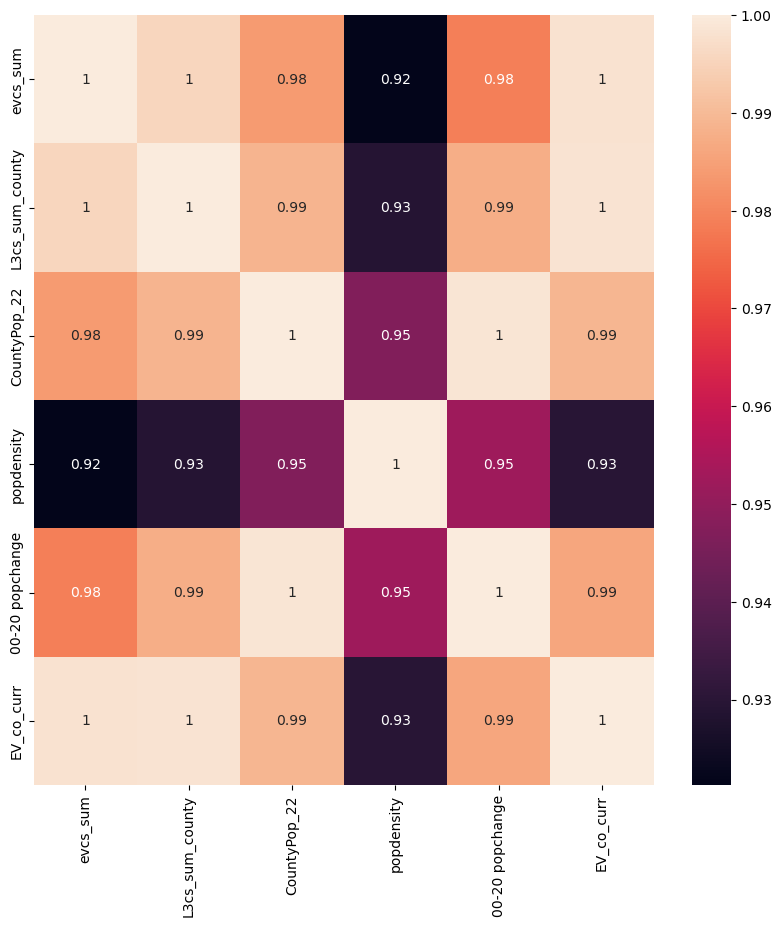

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_current.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.savefig("corr_WA_current.png") 

There are positive correlations between EV, EVCS & population measures, strong negative correlations with population density and all other measures.

 - EV_hist - Record of EV sales

In [23]:
# Create a correlation matrix using pandas for EVCS data

df_hist.corr()

,BEVcount,PHEVcount,EV Total,Total Vehicles,BEV %,Overall EV %,Cum_CS_count,Cum_EVCS_WA,EstPop,EVperson,Vperson
BEVcount,1.000000,0.981496,0.999029,0.811675,0.256840,0.622831,0.949808,0.144270,0.695685,0.438943,-0.373808
PHEVcount,0.981496,1.000000,0.988978,0.897421,0.278222,0.624773,0.916937,0.133744,0.755579,0.439014,-0.438867
EV Total,0.999029,0.988978,1.000000,0.834068,0.262592,0.625311,0.945367,0.142323,0.711750,0.440393,-0.389978
Total Vehicles,0.811675,0.897421,0.834068,1.000000,0.284364,0.496264,0.724302,0.052674,0.802245,0.326326,-0.572727
BEV %,0.256840,0.278222,0.262592,0.284364,1.000000,0.511032,0.246042,0.398440,0.276536,0.494573,-0.157482
Overall EV %,0.622831,0.624773,0.625311,0.496264,0.511032,1.000000,0.599342,0.451169,0.504742,0.968168,-0.173993
Cum_CS_count,0.949808,0.916937,0.945367,0.724302,0.246042,0.599342,1.000000,0.142039,0.704926,0.418783,-0.361077
Cum_EVCS_WA,0.144270,0.133744,0.142323,0.052674,0.398440,0.451169,0.142039,1.000000,-0.089534,0.438256,-0.031545
EstPop,0.695685,0.755579,0.711750,0.802245,0.276536,0.504742,0.704926,-0.089534,1.000000,0.331847,-0.561644
EVperson,0.438943,0.439014,0.440393,0.326326,0.494573,0.968168,0.418783,0.438256,0.331847,1.000000,-0.016295


In [24]:
df_hist.columns

Index(['Date', 'County', 'BEVcount', 'PHEVcount', 'EV Total', 'Total Vehicles',
       'BEV %', 'Overall EV %', 'Cum_CS_count', 'Cum_EVCS_WA', 'EstPop',
       'EVperson', 'Vperson'],
      dtype='object')

In [25]:
# Create a subset excluding the label columns. Exclude BEV count and PHEV count as the EV total is them added together and gives nearly similar results

sub_hist = df_hist[['EV Total', 'Total Vehicles', 'BEV %', 'Overall EV %', 'Cum_CS_count', 'Cum_EVCS_WA',
       'EstPop', 'EVperson', 'Vperson']]

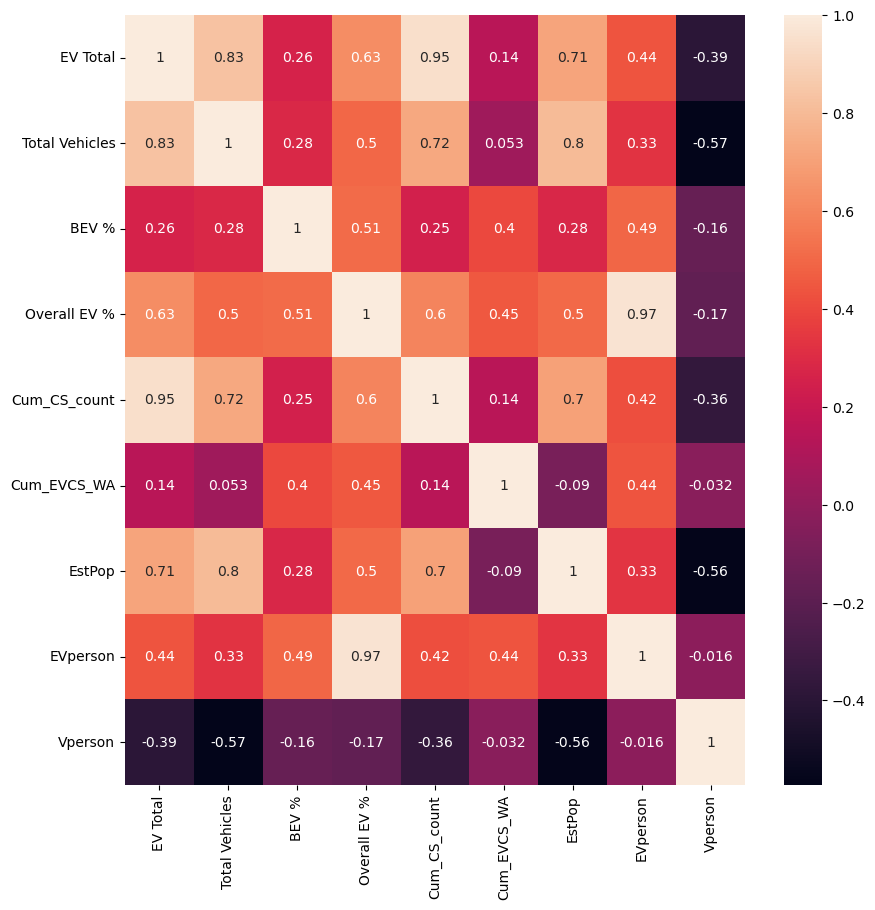

In [26]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr3 = sns.heatmap(sub_hist.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.savefig("corr_V2_hist.png")

Correlations in the history of EV sales dataset:
BEV, PHEV, Total EV counts
- The count of BEV, PHEV, and EV total are all strongly correlated with each other and show similar patterns of correlation with the other variables.

EV Total (per county/month) has a strong positive correlation with the count of Total vehicles which suggests that registrations of EV and non-EV rise at similar rates.
EV Total (per county/month) has a strong positive correlation with the Cumulative count of CS per county which suggests that both rise at similar rates.
EV Total (per county/month) has a strong positive correlation with the Estimated Population of the county suggesting that both increase at similar rates.
EV Total (per county/month) has a strong positive correlation with the overall % of EV registrations suggesting that both increase at similar rates.

Total Vehicles has a very strong positive correlation with the Estimated Population of the county suggesting that people buy vehicles at a consistent rate.
Total Vehicles has a strong positive correlation with the Cumulative count of CS per county which suggests that both rise at similar rates. However this could be because the cumulative CS per count has a strong positive correlation with the Estimated population.
Total Vehicles has a positive correlation with the overall % of EV registrations suggesting that as sales of vehicles increase, so does the relative % of EV sold.

BEV% - the % of EV that are BEV has a positive correlation with the overall % of EV registrations suggesting that as sales of vehicles increase, so does the relative % of BEV sold.

The Overall % of EV soil has a strong positive correlation with the cumulative CS count per county suggesting that as more EV are on the road there are more CS opened.
The Overall % of EV soil has a moderate positive correlation with the cumulative CS count for WA state suggesting that as more EV are on the road there are more CS opened.

The Cumulative CS count per county has a strong positive correlation with the Estimated Population suggesting more CS are opened where there are population increases.

*The rate of Overall EV% has a stronger positive correlation with the rate of EV/person since they are different ways of measuring similar data.
The rate of EV% per person also has a moderate positive correlation with EV total and BEV% suggesting higher rates of total EV (which correlate with higher % of BEV) results in an increase of EV per person.
Cumulative CS per county and Cumulative CS for WA have a moderately positive correlation with Ev/person suggesting that more people driving EV increases the need for CS.

*The Total Vehicles per person has a strong negative correlation with Estimated Population and Total vehicles suggesting that as the Estimated population rises there are fewer vehicles per person.

## 3b. Scatterplots

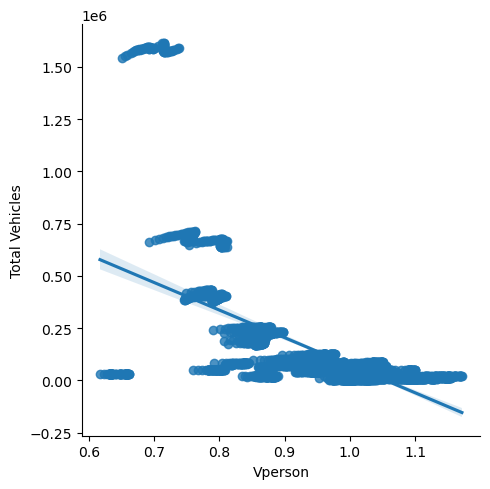

In [27]:
 # Create a scatterplot for the Total vehicles vs vehicles/person

sns.lmplot(y = 'Total Vehicles', x = 'Vperson', data = df_hist)
#plt.savefig("scatter_EVruc_pop.png")

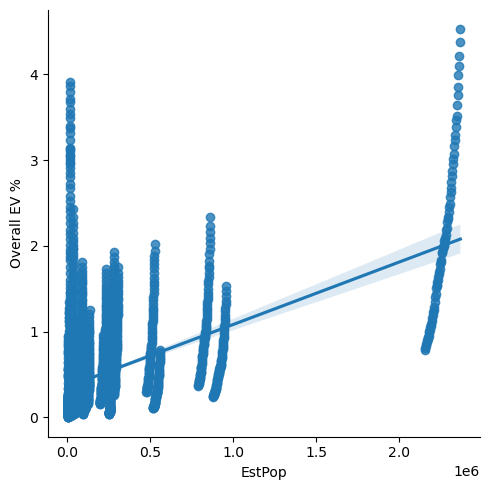

In [28]:
 # Create a scatterplot for the Overall EV% vs Est pop

sns.lmplot(y = 'Overall EV %', x = 'EstPop', data = df_hist)
#plt.savefig("scatter_EVruc_pop.png")

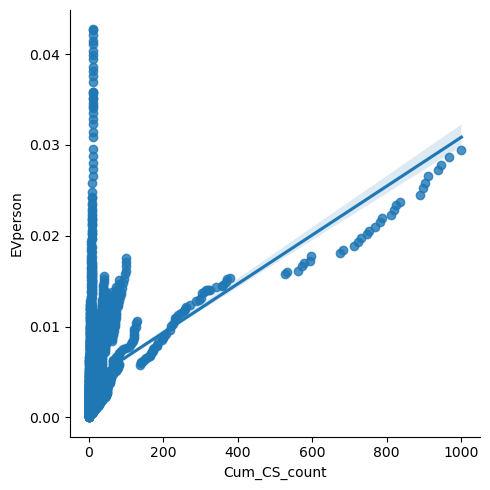

In [29]:
 # Create a scatterplot for the EVperson vs Cum_CS_count

sns.lmplot(y = 'EVperson', x = 'Cum_CS_count', data = df_hist)

There is a trend of the more EV per person correlating with higher EVCS per county, likely in more urbanized counties, possibly people in rural counties charge their EV in other locations or at home.

# Q2 - relationship between the availability of charging infrastructure and EV adoption rates
This dataset has a time component. The total number of EV per county increases at a consistent rate with the cumulative number of EV charging stations opened in each county. 
The points are largly clustered under the sub-10000 EV Total mark. There seems to be at least two counties that diverge from the cluster in the bottom left of the graph, one with a higher number of EVs then CS and another with more CS then Total EV and which has the highest number of CS and EV overall (King County). The data might show a different association if these are filtered out.

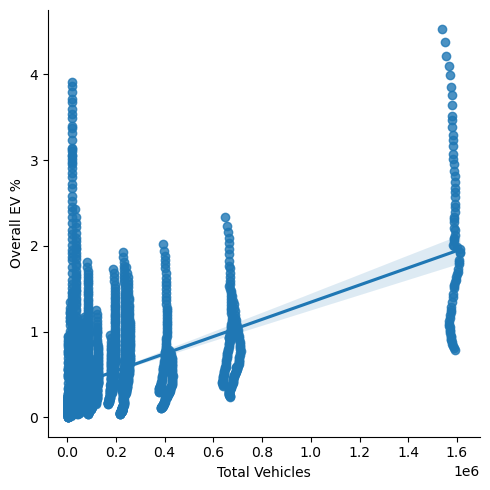

In [31]:
# Create a scatterplot
sns.lmplot(x = 'Total Vehicles', y = 'Overall EV %', data = df_hist)
#plt.savefig("scatter_totVe_EV%.png")

This dataset has a time component so a clearer relationship might be shown when averaged. The plot does indicate that overall EV% as a share of total vehicles increases with higher numbers of total vehicles.

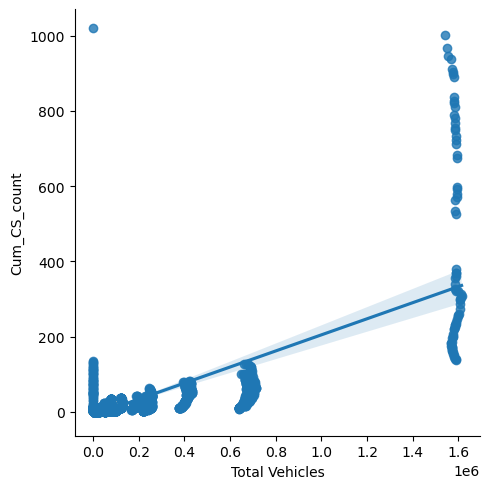

In [33]:
# Create a scatterplot
sns.lmplot(x = 'Total Vehicles', y = 'Cum_CS_count', data = df_hist)
#plt.savefig("scatter_cum_CS_TotV.png")

This dataset has a time component. This relationship seems to be because of the strong relationship between cumulative EVCS count and the EV total. EV total & Total Vehicles also have a strong relationship.

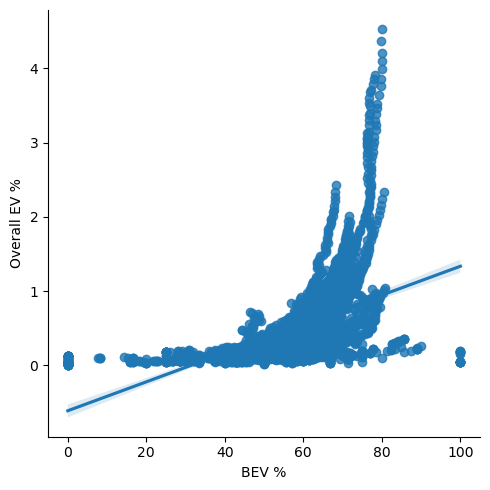

In [34]:
# Create a scatterplot
sns.lmplot(x = 'BEV %', y = 'Overall EV %', data = df_hist)
#plt.savefig("scatter_BEV%_EV%.png")

### Q6 related
- This data has a time component. The linear trendline is may not the be best fit for the data. The time element is important here but it looks as though the sales of BEV has contributed to higher % of EV cars as a portion of vehicle sales.

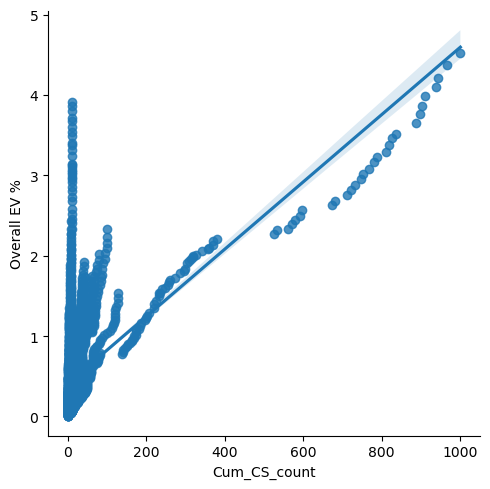

In [35]:
# Create a scatterplot
sns.lmplot(x = 'Cum_CS_count', y = 'Overall EV %', data = df_hist)
#plt.savefig("scatter_cumCS_EV%.png")

As the overall EV% of vehicles increase so are the number of EVCS in each county. However some counties have 0 charging stations for a period of time. King county is very influential on the trendline

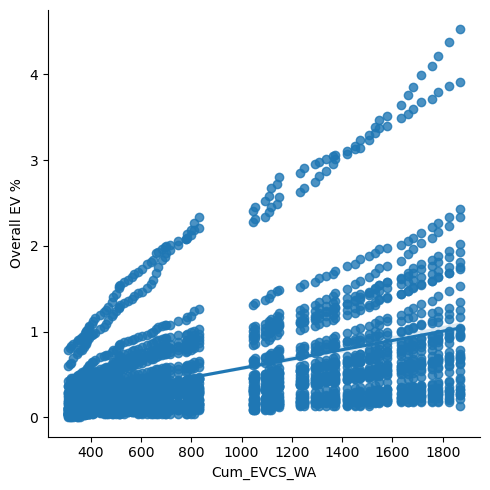

In [36]:
# Create a scatterplot
sns.lmplot(x = 'Cum_EVCS_WA', y = 'Overall EV %', data = df_hist)
#plt.savefig("scatter_cumEVCSWA_EV%.png")

Because of merging the Cumulative EVCS for WA state is repeated for each WA county. Therefore the trendline is the average Overall EV5 for each county and each line of points can be seen as the overall EV for that county as EVCS are opened.

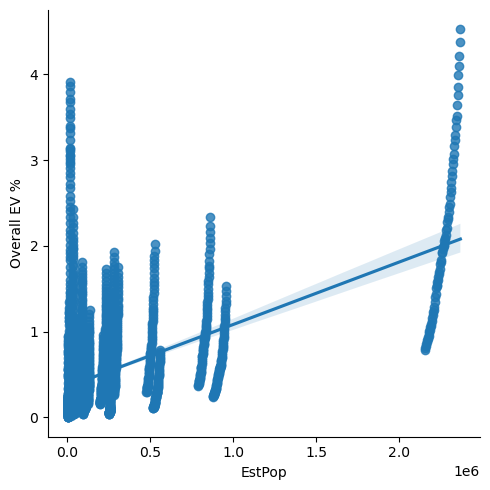

In [37]:
# Create a scatterplot
sns.lmplot(x = 'EstPop', y = 'Overall EV %', data = df_hist)
#plt.savefig("scatter_estpop_EV%.png")

# Q7 Relationship between the population of an area and the % change in EV ownership? 
The datapoints are generated from a dataset with a time component, and the plot seems to show a change in the % of EV registrations over time. There is a strong positive correlation in the percent of EV ownership as the population increases.


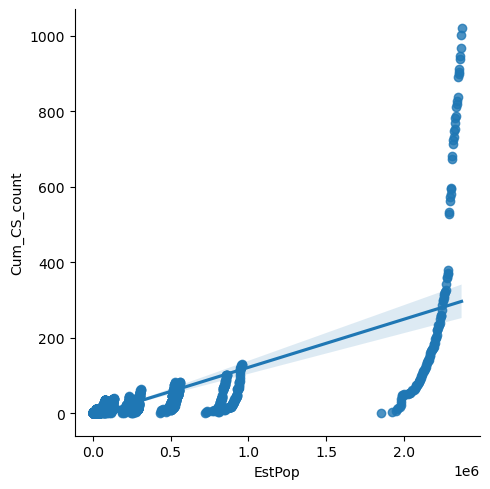

In [39]:
# Create a scatterplot
sns.lmplot(y = 'Cum_CS_count', x = 'EstPop', data = df_hist)
#plt.savefig("scatter_pop_cumCS.png")

This dataset has a time component. As both the population and the number of chargings stations increase over time they will move in similar patterns.

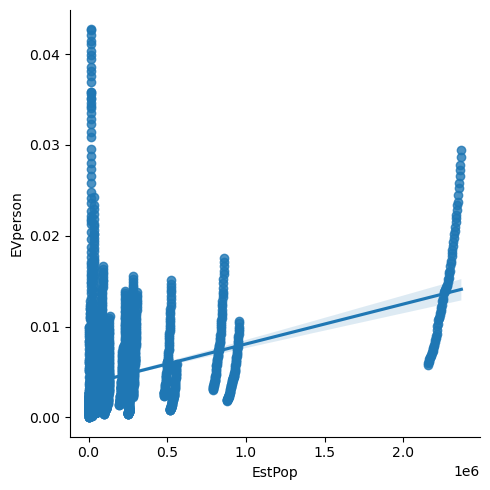

In [40]:
# Create a scatterplot
sns.lmplot(y = 'EVperson', x = 'EstPop', data = df_hist)
#plt.savefig("scatter_EVperson_pop.png")

This dataset has a time component. The trendline can be viewed as the average overall EV per person which increases as the population increases. This correlation likely because the rate of EV sales increased over the years.

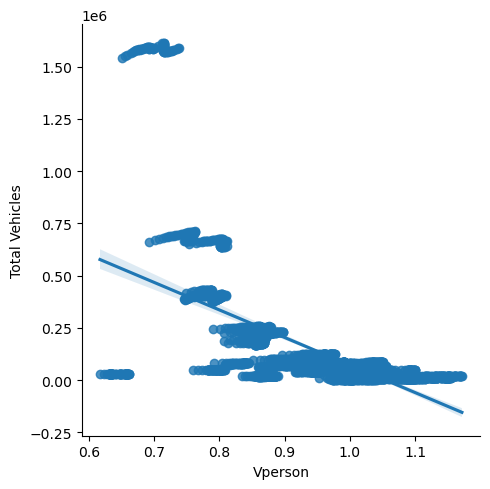

In [41]:
# Create a scatterplot
sns.lmplot(x = 'Vperson', y = 'Total Vehicles', data = df_hist)
#plt.savefig("scatter_Vperson_TV.png")

This dataset has a time component. The scale of the y-axis exaggerates the slope of the line. This correlation suggests that the rate of the estimated population (used to calculate TV/person) rises faster than the number of Total Vehicles, leading to a negative correlation.


# 3b. Pair plots

In [42]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3203 non-null   datetime64[ns]
 1   County          3203 non-null   object        
 2   BEVcount        3203 non-null   int32         
 3   PHEVcount       3203 non-null   int32         
 4   EV Total        3203 non-null   int32         
 5   Total Vehicles  3203 non-null   int32         
 6   BEV %           3003 non-null   float64       
 7   Overall EV %    3003 non-null   float64       
 8   Cum_CS_count    3203 non-null   int32         
 9   Cum_EVCS_WA     3203 non-null   int32         
 10  EstPop          3203 non-null   int64         
 11  EVperson        3003 non-null   float64       
 12  Vperson         3003 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(6), int64(1), object(1)
memory usage: 250.4+ KB


In [43]:
# Keep only the variables you want to use in the pair plot

df_hist_pair = df_hist[['BEVcount', 'PHEVcount', 'EV Total', 'Total Vehicles', 'BEV %', 'Overall EV %', 'Cum_CS_count', 'Cum_EVCS_WA', 'EstPop', 'EVperson', 'Vperson']]

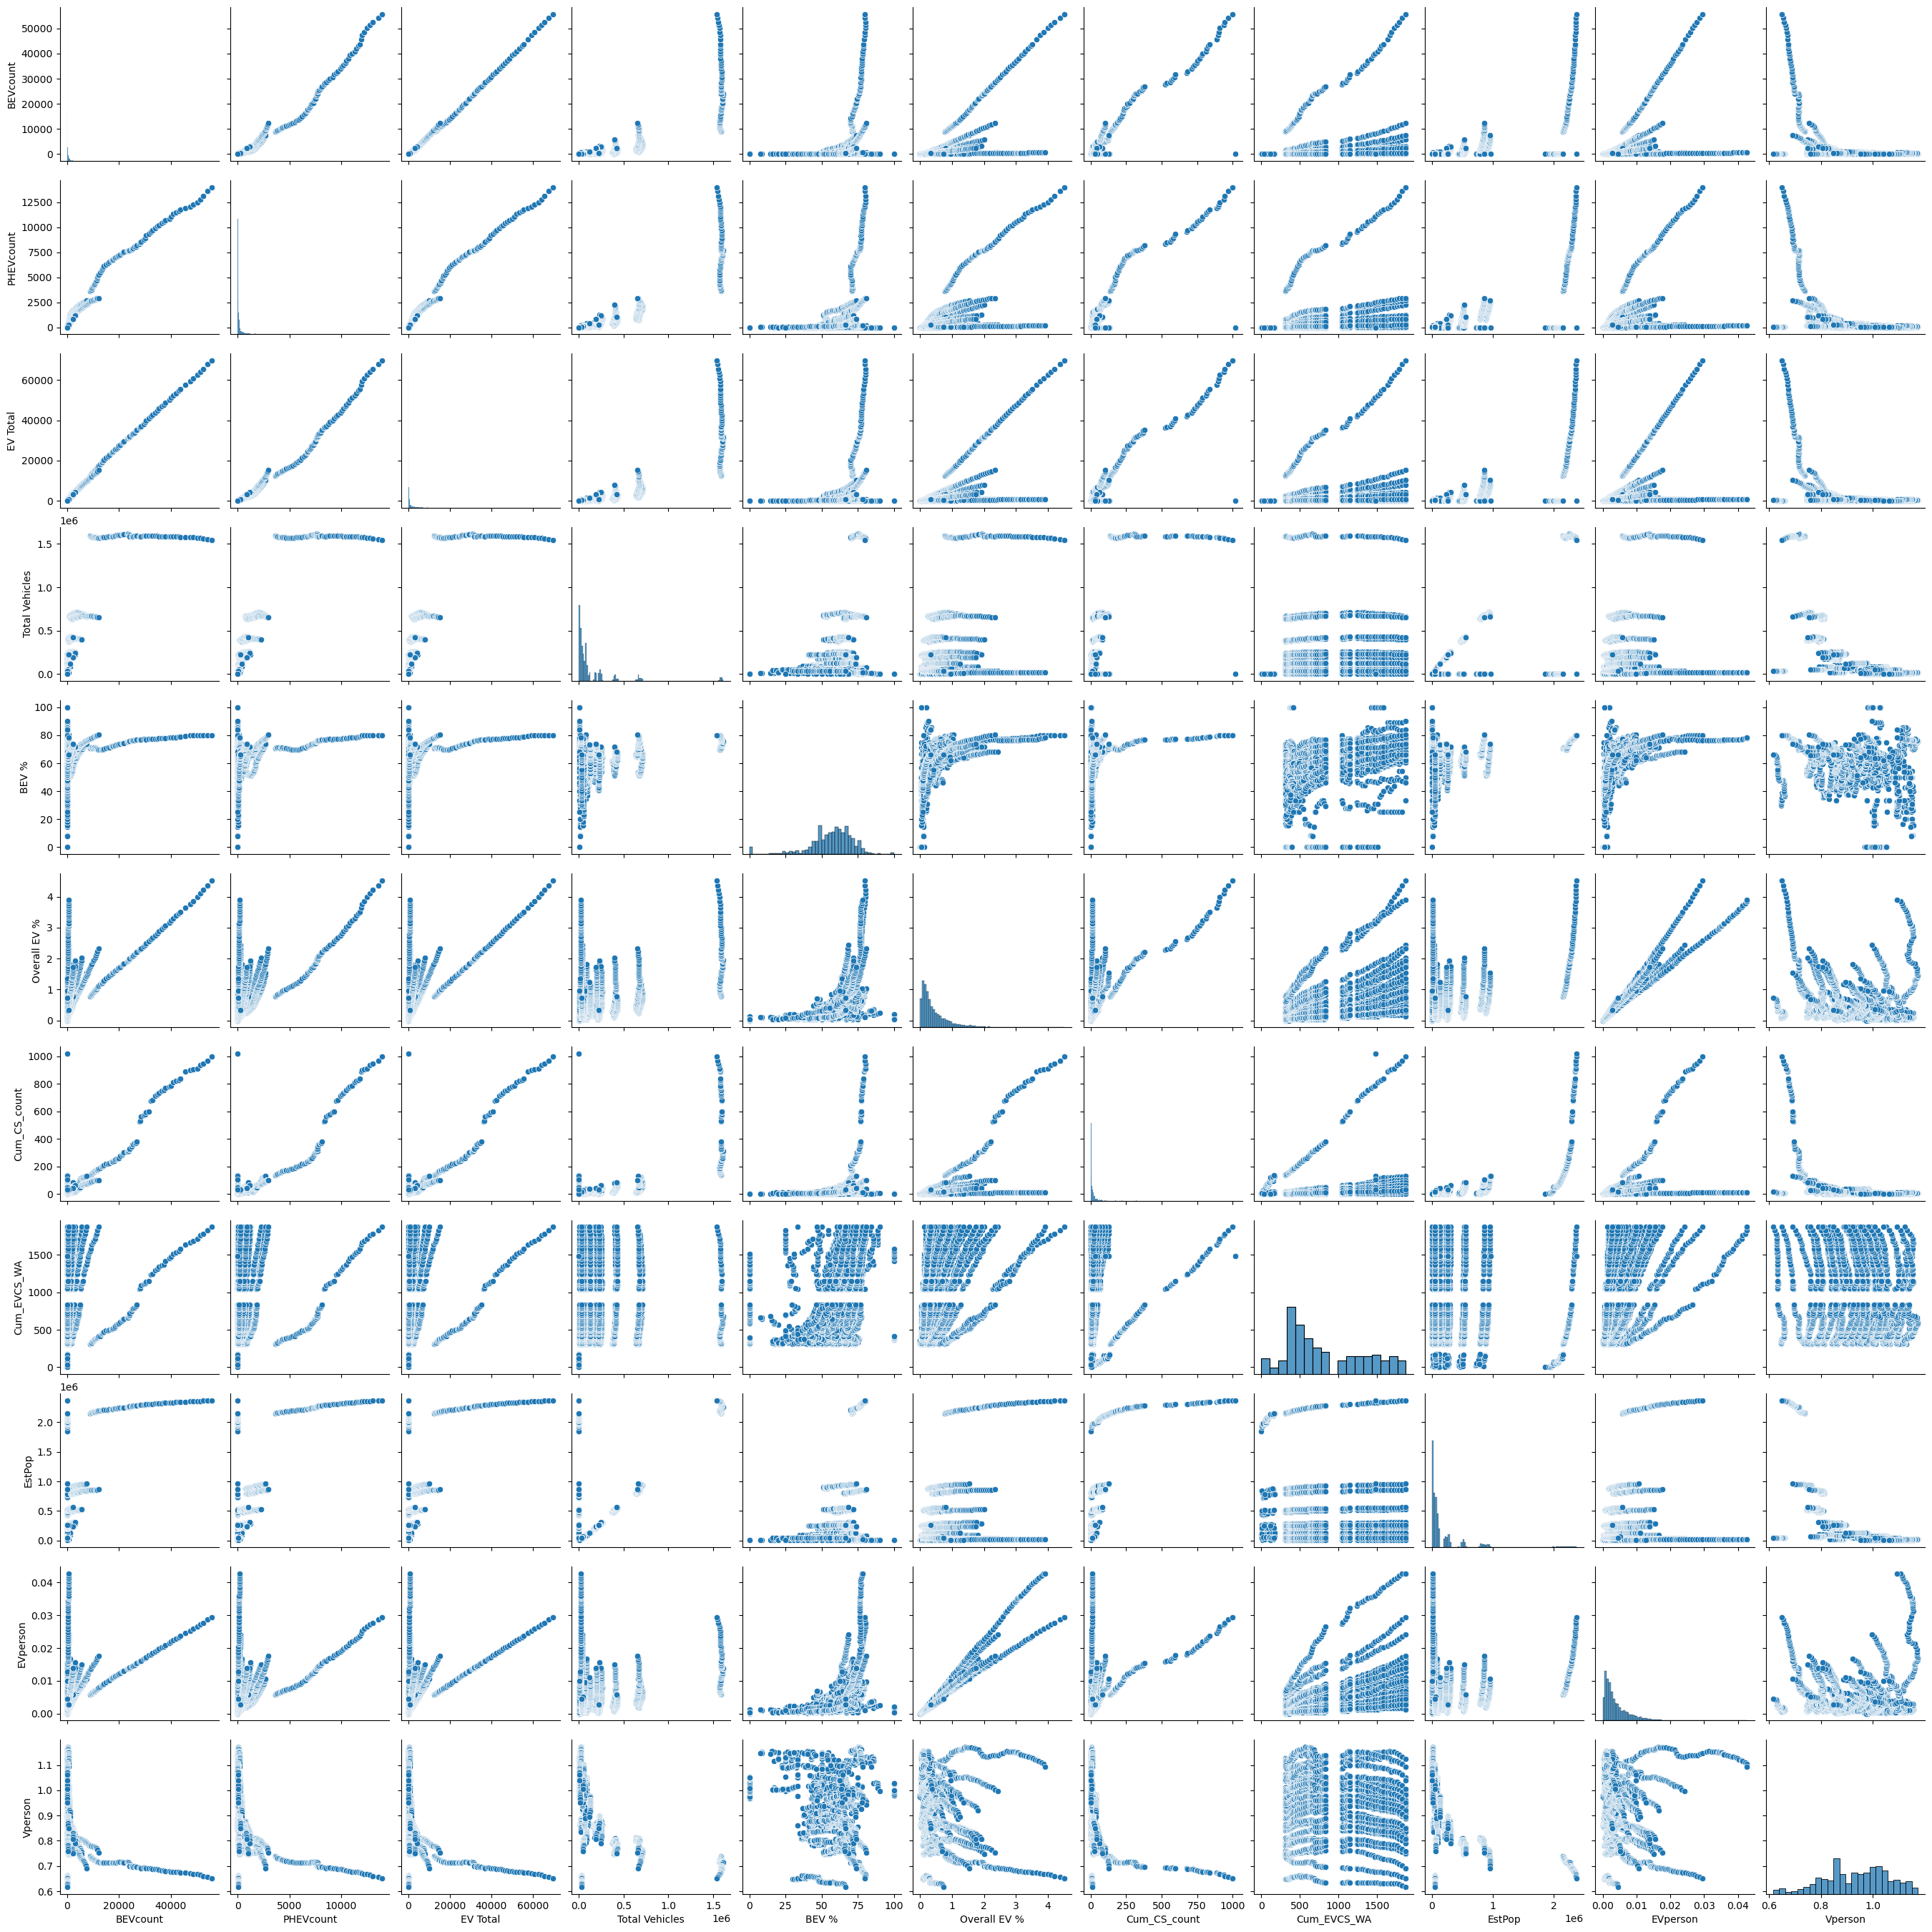

In [44]:
# Create a pair plot of EV_hist

g = sns.pairplot(df_hist_pair)
plt.savefig("pair_hist.png")

In [46]:
# Keep only the variables you want to use in the pair plot - not including BEV count and PHEV count

df_ev_hist_pair2 = df_hist[['EV Total', 'Total Vehicles', 'BEV %', 'Overall EV %', 'Cum_CS_count', 'Cum_EVCS_WA', 'EstPop']]

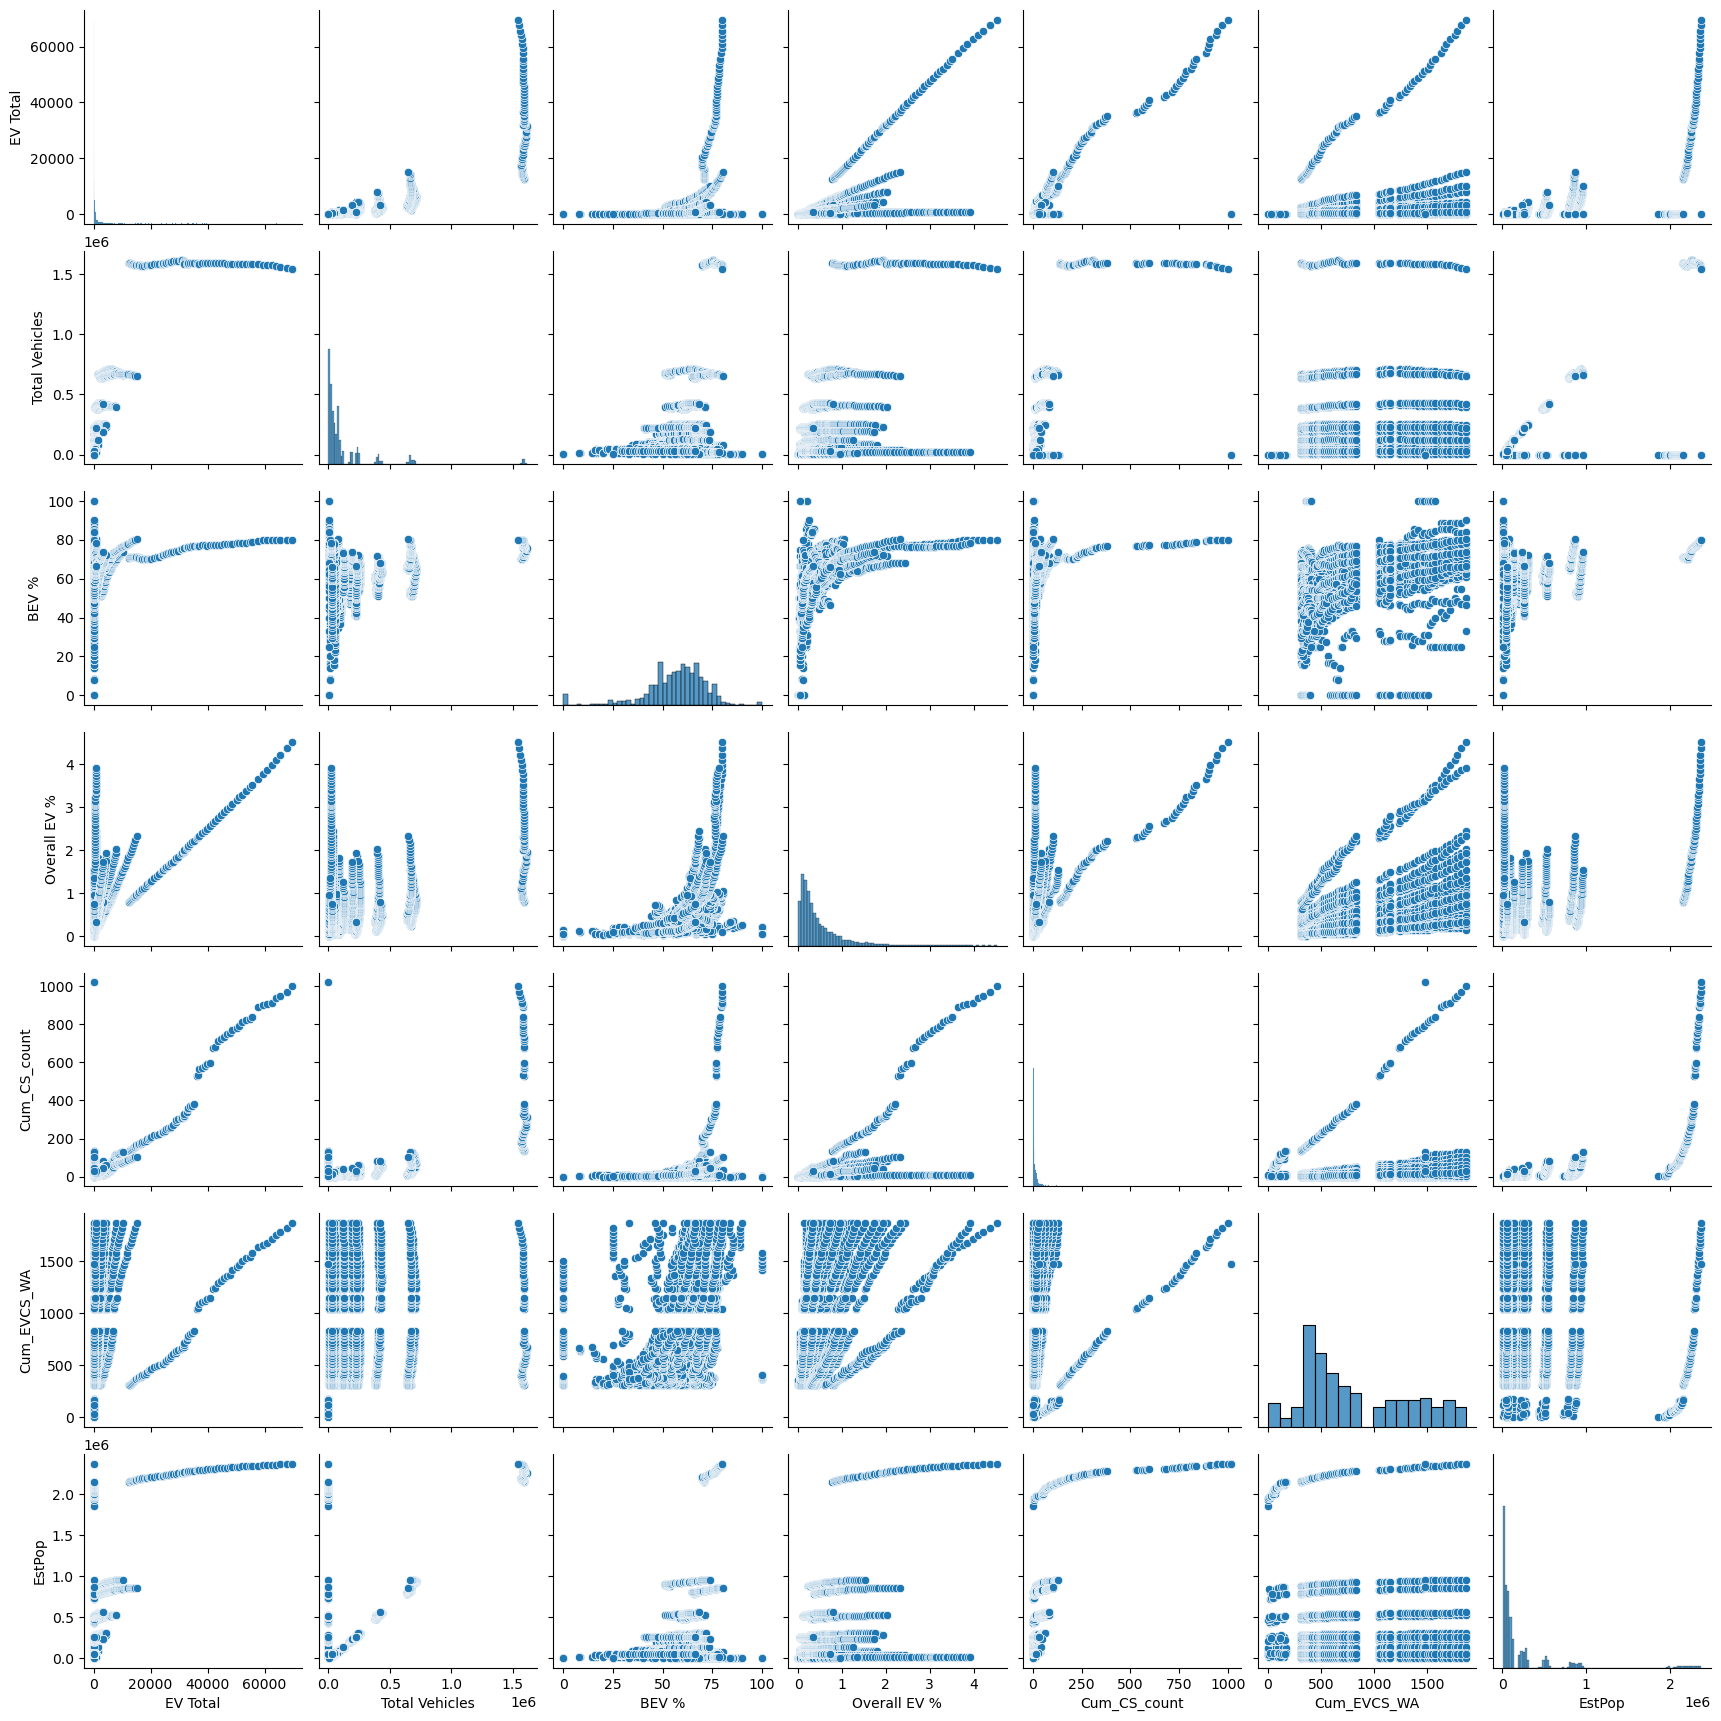

In [47]:
# Create a pair plot of EV_hist

g = sns.pairplot(df_ev_hist_pair2)
#plt.savefig("pair2_EV_hist.png")

In [48]:
df_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           1902 non-null   object 
 1   evcs_sum         1902 non-null   int32  
 2   L3cs_sum_county  1900 non-null   float64
 3   L3port present   1900 non-null   object 
 4   CountyPop_22     1902 non-null   int64  
 5   popdensity       1902 non-null   float64
 6   density flag     1902 non-null   object 
 7   00-20 popchange  1902 non-null   int64  
 8   EV_co_curr       1902 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 141.2+ KB


In [49]:
# Keep only the variables you want to use in the pair plot

df_evcs_pair = df_present[['evcs_sum', 'CountyPop_22', 'popdensity', 'L3cs_sum_county', '00-20 popchange', 'EV_co_curr']]

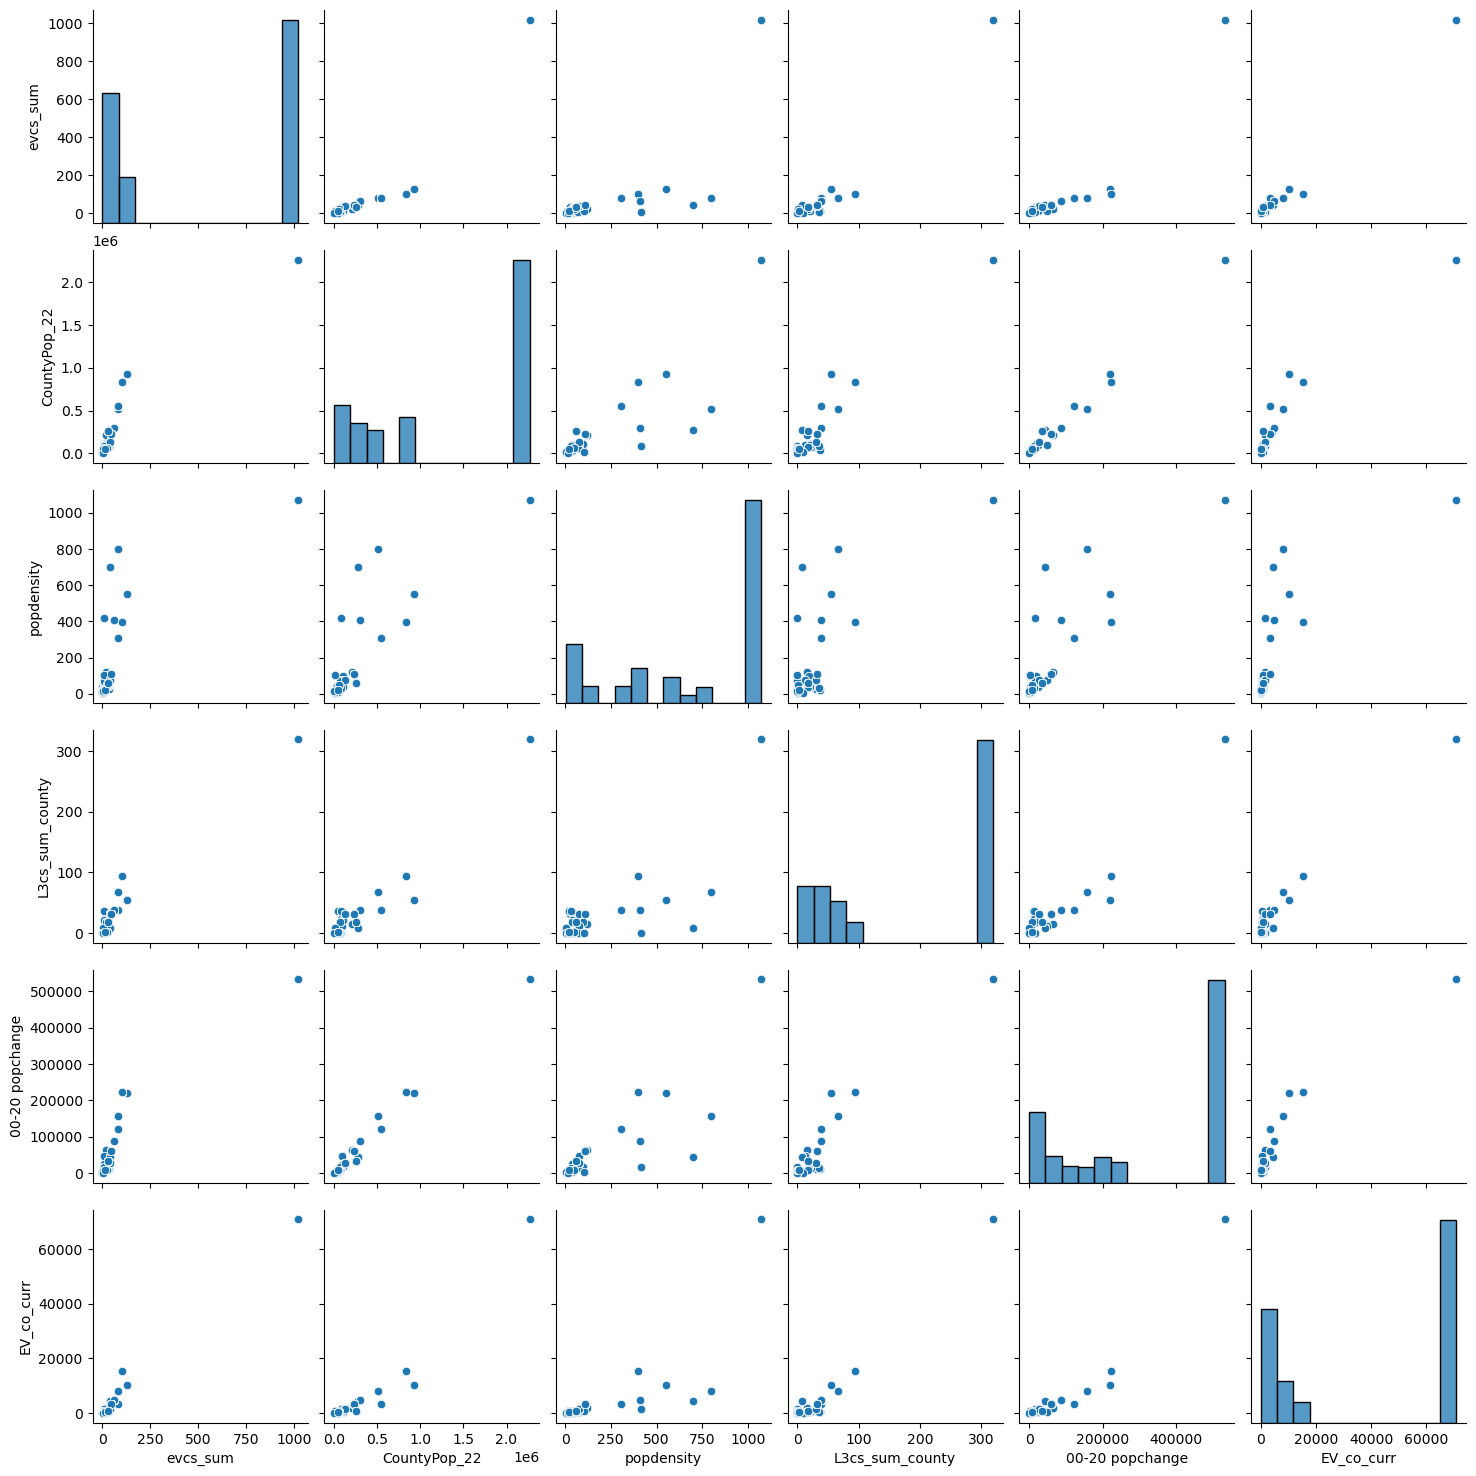

In [50]:
# Create a pair plot of EVCS

g = sns.pairplot(df_evcs_pair)
#plt.savefig("pair_EVCS.png")

## 3c. Catagorical Plots

In [51]:
# Import data for 2022 population information

df_present2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_present.pkl'))

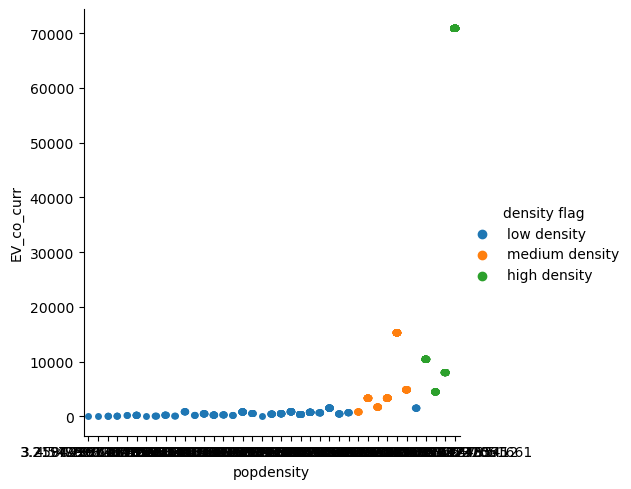

In [52]:
# Create a categorical plot in seaborn using the RUC label variable

g = sns.catplot(y="EV_co_curr", x="popdensity", hue="density flag", data=df_present2)

## 4. Project Questions (revised)

Q1 - What is the relationship between the number of EV charging stations and the number of registered EVs in each county? 

- There is a strong positive correlation between the number of EV registered in a county and the number of EV charging stations in a county. 

Q2 - Is there a correlation between the availability of charging infrastructure and EV adoption rates?

- The total number of EV per county increases at a consistent rate with the cumulative number of EV charging stations opened in each county. 

Q3 - Are EVs with longer battery ranges more popular in certain counties or municipalities? 
- Hard to determine with certainty since the battery ranges of many recent models are not reported in the data (see CAFV eligibility). Not an essential question for analysis.

Q4 - How has the population composition (urban, rural, metro) of each county influenced EV adoption? 
 - Currently unable to determine due to uncertainly with RU county codes. Need to research and determine a way to group counties.
 - Higher population counties strongly correlate with more EV per county, suggesting that more populous counties have higher rates of EV adoption.

Q5 - What is the trend in EV ownership at the county level? 
- redundant, see Q4.

Q6 - Are there any significant increases or decreases in EV registrations?
- BEV% over time compared to Overall EV% over time - preliminary investigation suggests that the increase in Overall %EV as a portion of total vehicles registered is related to higher amounts of registrations of BEV.

Q7 - Is there a correlation between the population of a county and the percentage change in EV ownership? 
- (EV Total and EstPop) -There is a strong positive correlation in the percent of EV ownership as the population increases. (plot rate of EV total increase over time by rate of population change?)

Q8 - How has the population of each county changed over the past 30 years? 
- Counties in Washington state have grown in population over the past 30 years. 
- DEEPER QUESTION - Compare rate of population growth by county to the rate of growth in EV and EVCS.

Q9 - Are there trends in the location of Level 3 charging stations? 
- Requires further investigation on geographic location throughout the state. Initial investigation suggests L3 charging ports are present at roughly every 3-4 EVCS. Also investigate the difference between the presence of a port and the presence of a number of ports. 

## 5. Hypotheses

Hyp 1 - Growth Rate of EV is greater than the Population growth rate.

Hyp 2 - % of EV registrations has increased over time 

Hyp 3 - Urban counties have higher rates of EV ownership 

Hyp 4 - (cyclical) as EV/pop increases, there's a corresponding increase in number of EVCS